In [44]:
import os 
import numpy as np 
import json
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from nutil.plot import paperStyle
import seaborn as sns



In [ ]:
# import shutil

# folder = "/bagls/"
# for filename in os.listdir(HISTORY_PATH + folder ):
#     if "_kvasir" in filename:
#         new_filename = filename.replace("_kvasir", "")
#         old_file_path = os.path.join(HISTORY_PATH+ folder, filename)
#         new_file_path = os.path.join(HISTORY_PATH+ folder, new_filename)
        
#         shutil.move(old_file_path, new_file_path)

In [67]:
def plot_history_line(paths, title = None, legends_on=False, vertical = True, save_path = None):
    with paperStyle():
        colors = cm.rainbow(np.linspace(0, 1, len(paths)))
        if vertical == True: 
            fig, axes = plt.subplots(2, figsize=(3, 2))
        else: 
            fig, axes = plt.subplots(1, 2, figsize=(6, 2))

        handles, labels = [], []

        for path, color in zip(paths, colors):
            with open(os.path.join(path), 'r') as f:
                history = json.load(f)

            # Use the color from the colormap for each file
            plot0, = axes[0].plot(range(1,len(history['loss'])+1), history['loss'], color=color)
            plot1, = axes[1].plot(range(1,len(history['iou_score'])+1), history['iou_score'], color=color)

            if legends_on:
                parts = path.split("_")
                current_num_nests = int(parts[1])
                current_num_filters = int(parts[2])
                current_operation = parts[3]
                legend = f"n = {current_num_nests}, filters = {current_num_filters}"
                handles.append(plot0)
                labels.append(legend)

        if legends_on:
            fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

        if title is not None: 
            axes[0].set_title(f"Loss for {title}", fontsize=8)
            axes[1].set_title(f"IoU for {title}", fontsize=8)
        else: 
            axes[0].set_title('Loss for All History Files', fontsize=8)
            axes[1].set_title('IoU for All History Files', fontsize=8)
        
        axes[0].set_xlabel('Epochs', fontsize=8)
        axes[0].set_ylabel('Loss', fontsize=8)
        axes[1].set_xlabel('Epochs', fontsize=8)
        axes[1].set_ylabel('IoU', fontsize=8)
        axes[0].set_xlim([0, len(history['loss'])])
        axes[1].set_xlim([0, len(history['loss'])])
        sns.despine(trim=True, offset=5)
        
        plt.tight_layout()
        if save_path is not None:
            plt.savefig(save_path)
        plt.show()

In [66]:
def plot_history_scatter(paths, title = None, legends_on=False, vertical = True, save_path = None):
    with paperStyle():
        colors = cm.rainbow(np.linspace(0, 1, len(paths)))
        if vertical == True: 
            fig, axes = plt.subplots(2, figsize=(3, 2))
        else: 
            fig, axes = plt.subplots(1, 2, figsize=(6, 2))

        handles, labels = [], []

        for path, color in zip(paths, colors):
            with open(os.path.join(path), 'r') as f:
                history = json.load(f)

            # Use the color from the colormap for each file
            scatter0 = axes[0].scatter(range(1,len(history['loss'])+1), history['loss'], color=color)
            scatter1 = axes[1].scatter(range(1,len(history['iou_score'])+1), history['iou_score'], color=color)

            if legends_on:
                parts = path.split("_")
                current_num_nests = int(parts[1])
                current_num_filters = int(parts[2])
                current_operation = parts[3]
                legend = f"n = {current_num_nests}, filters = {current_num_filters}"
                handles.append(scatter0)
                labels.append(legend)

        if legends_on:
            fig.legend(handles, labels, loc='upper left', bbox_to_anchor=(1.05, 1))

        if title is not None: 
            axes[0].set_title(f"Loss for {title}", fontsize=8)
            axes[1].set_title(f"IoU for {title}", fontsize=8)
        else: 
            axes[0].set_title('Loss for All History Files', fontsize=8)
            axes[1].set_title('IoU for All History Files', fontsize=8)
        
        axes[0].set_xlabel('Epochs', fontsize=8)
        axes[0].set_ylabel('Loss', fontsize=8)
        axes[1].set_xlabel('Epochs', fontsize=8)
        axes[1].set_ylabel('IoU', fontsize=8)
        axes[0].set_xlim([0, len(history['loss'])])
        axes[1].set_xlim([0, len(history['loss'])])

        sns.despine(trim=True, offset=5)

        plt.tight_layout()
        if save_path is not None:
            plt.savefig(save_path)
        plt.show()

In [57]:
def filter_paths(paths, num_nests, num_filters, operation):
    filtered_paths = [path for path in paths if f"history_{num_nests}_{num_filters}_{operation}" in path]
    return filtered_paths

def paths_fixed_nests(paths, num_nests):
    filtered_paths = [path for path in paths if f"history_{num_nests}" in path]
    return filtered_paths

def paths_fixed_operation(paths, operation):
    filtered_paths = [path for path in paths if f"_{operation}" in path]
    return filtered_paths

In [83]:
HISTORY_PATH = "./history"
FOLDER = "/spleen/"
HISTORY_PATH += FOLDER
raw_paths = [os.path.join(HISTORY_PATH, path) for path in os.listdir(HISTORY_PATH)]

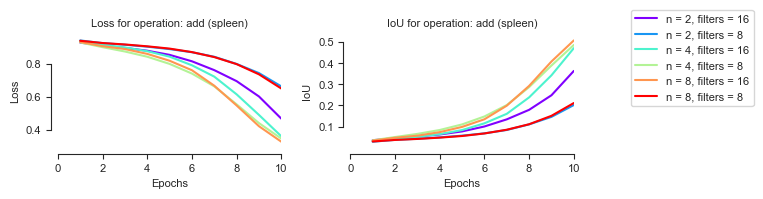

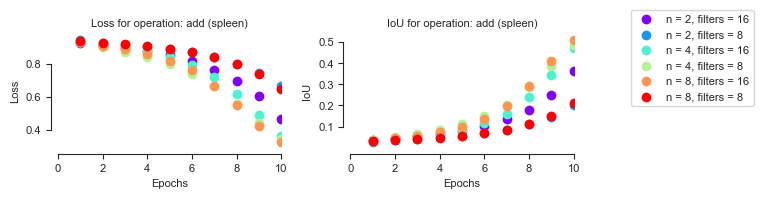

In [84]:
dataset_name = FOLDER.replace("/", "")
operation = "add"
target_files = paths_fixed_operation(raw_paths, operation)

plot_history_line(target_files, title = f"operation: {operation} ({dataset_name})", legends_on=True, vertical = False)
plot_history_scatter(target_files, title = f"operation: {operation} ({dataset_name})", legends_on=True, vertical = False)

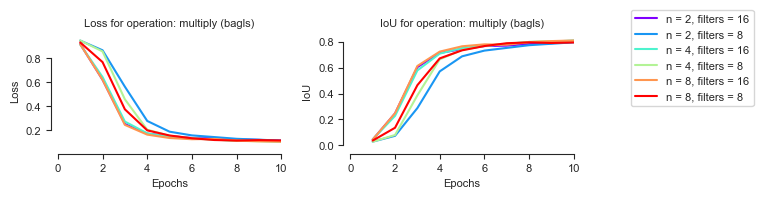

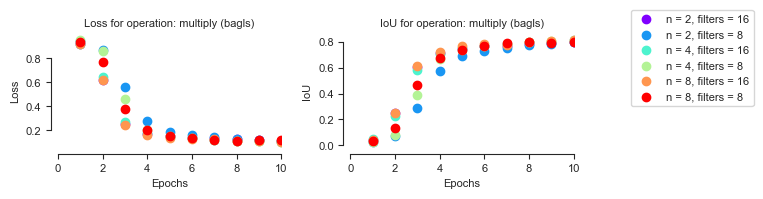

In [70]:
operation = "multiply"
target_files = paths_fixed_operation(raw_paths, operation)

plot_history_line(target_files, title = f"operation: {operation} ({dataset_name})", legends_on=True, vertical = False)
plot_history_scatter(target_files, title = f"operation: {operation} ({dataset_name})", legends_on=True, vertical = False)

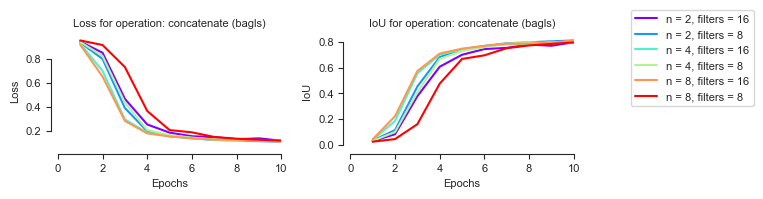

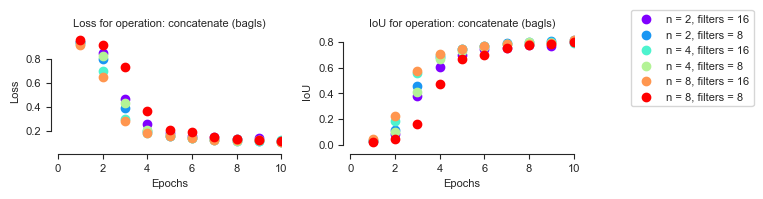

In [71]:
operation = "concatenate"
target_files = paths_fixed_operation(raw_paths, operation)

plot_history_line(target_files, title = f"operation: {operation} ({dataset_name})", legends_on=True, vertical = False)
plot_history_scatter(target_files, title = f"operation: {operation} ({dataset_name})", legends_on=True, vertical = False)